In [1]:
!pip install pyaes


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import numpy as np

trace_array = []
text_out_array = []

for n in range(0,10):
    trace_array.append(np.load(r"D:\DCPA\kyber\trace\cw_part{0}.npy".format(n),allow_pickle=True))
    text_out_array.append(np.load(r"D:\DCPA\kyber\trace\cw_part{0}_coins.npy".format(n),allow_pickle=True))

In [28]:
print(list(text_out_array[0][1]))

[236, 251, 10, 253, 153, 254, 19, 250, 213, 5, 142, 5, 31, 1, 202, 0, 85, 255, 110, 2, 41, 6, 182, 0, 194, 3, 78, 251, 62, 250, 188, 5]


In [2]:
%matplotlib notebook
import matplotlib.pylab as plt
import random

# convert msg into list with each elements represent 1 bit.
def convert_msg(m,length):
    res = []
    for j in range(0,length): 
        s = m[j*2:j*2+2]
        s = "0x" + s
        res.append(int(s,16))
        #print(s,end=',')
    
    return res


In [3]:
from tqdm import tnrange
from tqdm.auto import tqdm
import gc
import numpy as np
import sys
import unittest
import os
import pyaes
sys.path.append(r"D:\Github\Python_Kyber")
from aes_drbg import AES_DRBG
from kem import *

g.set_mode(2)

with open(r"D:\DCPA\kybercoins.txt", 'r') as file:
    lines = file.readlines()

data_array = [line.strip() for line in lines]
ct_array = []

indcpa_seed = [124, 153, 53, 160, 176, 118, 148, 170, 12, 109, 16, 228, 219, 107, 26, 221, 47, 216, 26, 37, 204, 177, 72, 3, 45, 205, 115, 153, 54, 115, 127, 45] # copy this
z = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for data in data_array:
    seed = convert_msg(data.split()[-1],32)

    pk = [0]*g.KYBER_PUBLICKEYBYTES
    sk = [0]*g.KYBER_SECRETKEYBYTES
    crypto_kem_keypair(pk, sk, list(indcpa_seed), list(z))
    #print(list(indcpa_seed))
    #print(sk)

    ct = [0]*g.KYBER_CIPHERTEXTBYTES
    ss = [0]*g.KYBER_SSBYTES
    crypto_kem_enc(ct, ss, pk, seed)
    #print(seed)
    #print(sk)

    ct_array.append(ct)
print(len(data_array))
ct_array[0]

2000


[121,
 254,
 35,
 184,
 3,
 132,
 114,
 216,
 113,
 210,
 48,
 188,
 152,
 205,
 94,
 16,
 229,
 165,
 240,
 83,
 159,
 9,
 41,
 236,
 149,
 207,
 146,
 180,
 119,
 228,
 159,
 71,
 179,
 116,
 135,
 91,
 200,
 87,
 118,
 110,
 229,
 59,
 200,
 10,
 110,
 56,
 127,
 221,
 84,
 2,
 80,
 181,
 49,
 8,
 252,
 46,
 99,
 179,
 25,
 171,
 229,
 232,
 177,
 184,
 63,
 34,
 90,
 12,
 120,
 63,
 210,
 252,
 123,
 120,
 189,
 103,
 171,
 159,
 227,
 216,
 177,
 4,
 24,
 135,
 163,
 225,
 244,
 210,
 143,
 191,
 169,
 42,
 178,
 138,
 121,
 168,
 139,
 224,
 123,
 226,
 242,
 70,
 109,
 123,
 44,
 195,
 36,
 49,
 218,
 161,
 42,
 177,
 242,
 223,
 111,
 35,
 75,
 134,
 157,
 156,
 36,
 126,
 246,
 51,
 98,
 3,
 167,
 214,
 239,
 90,
 227,
 69,
 159,
 62,
 93,
 35,
 170,
 170,
 103,
 192,
 107,
 191,
 171,
 60,
 146,
 50,
 20,
 91,
 74,
 71,
 209,
 109,
 12,
 240,
 154,
 35,
 55,
 188,
 74,
 246,
 135,
 182,
 21,
 212,
 169,
 138,
 219,
 132,
 16,
 79,
 233,
 252,
 183,
 103,
 183,
 239,
 81,
 112

In [31]:
b_array = []

for ct in ct_array:
    b = polyvec()
    polyvec_decompress(b,ct)
    polyvec_ntt(b)
    b_array.append(b)
print(b_array[0].vec[0].coeffs)

[1101, 47, -323, -1663, -778, 610, -1397, -1057, -371, 1185, 930, -1620, -548, -400, -206, -948, 1506, 467, 1316, -543, 337, -877, 1000, 1225, 825, 70, -383, -1446, 669, -1459, -771, 283, 540, -1459, -1049, 754, 1185, 50, -471, -1629, 625, -1322, 1027, -733, -412, -51, 1416, -1472, 1420, -878, -973, -677, -919, 830, -1144, 1171, 1282, 362, 929, 892, -1458, -1157, -1633, 35, 704, -436, 1166, -1554, 292, 395, 788, -595, 1251, -267, 1208, -58, 443, -473, 1581, 460, -901, 1090, 574, -921, -1352, -419, -1272, -90, -126, -72, -1341, -1395, 68, 938, 1251, 237, -357, 1356, 693, 1282, -345, -562, 1112, 636, 751, 784, 861, -403, -1552, 1618, -1177, 629, 753, 221, -31, 1321, -727, 541, -1283, -814, 2, 1084, 1063, 1461, -272, 315, 594, 1212, 684, -998, 1016, -586, 634, 1389, 7, 86, 752, -941, 358, 672, 305, -321, 1593, -356, -1161, 1471, -88, -1044, 1235, 637, -1408, -545, 883, 730, 25, -1148, 301, 585, 1283, -799, -456, -561, 193, 842, 284, 7, -1333, 306, 1342, 1506, 382, 1623, 264, -102, -692, -

In [32]:
hc = [143, 92, 10, 26, 131, 82, 188, 129, 159, 254, 86, 149, 194, 126, 54, 244, 118, 30, 129, 68, 131, 200, 197, 171, 86, 148, 133, 24, 107, 230, 62, 82]

In [33]:
for i in range(0,32):
    sk[1600+i] = hc[i]

In [34]:
print(sk)

[108, 137, 43, 2, 151, 169, 199, 100, 20, 147, 248, 125, 175, 53, 51, 238, 214, 31, 7, 244, 101, 32, 102, 51, 126, 215, 64, 70, 220, 199, 27, 160, 63, 48, 150, 1, 3, 22, 31, 125, 235, 83, 167, 27, 17, 97, 114, 99, 254, 42, 128, 151, 105, 206, 109, 112, 168, 95, 230, 0, 236, 226, 157, 127, 54, 161, 109, 51, 27, 139, 42, 158, 29, 184, 192, 144, 116, 45, 240, 115, 159, 240, 96, 206, 180, 236, 197, 171, 28, 94, 85, 172, 151, 187, 102, 167, 248, 149, 16, 93, 87, 120, 43, 34, 149, 56, 227, 66, 21, 68, 163, 66, 20, 8, 219, 244, 73, 16, 147, 76, 196, 35, 119, 79, 22, 118, 255, 28, 48, 111, 151, 85, 95, 87, 180, 174, 215, 166, 186, 185, 80, 168, 22, 60, 141, 49, 141, 234, 98, 117, 27, 214, 171, 197, 6, 156, 6, 200, 143, 51, 0, 38, 161, 152, 6, 160, 59, 151, 167, 105, 107, 86, 218, 33, 130, 123, 180, 232, 220, 3, 17, 82, 180, 27, 137, 42, 158, 153, 173, 246, 225, 150, 62, 150, 87, 136, 40, 21, 79, 70, 112, 51, 132, 105, 32, 251, 180, 184, 5, 68, 231, 232, 168, 26, 233, 99, 207, 54, 140, 155, 160

In [35]:
skpv = polyvec()
unpack_sk(skpv,sk)

In [36]:
zetas = [-1044,  -758,  -359, -1517,  1493,  1422,   287,   202,
   -171,   622,  1577,   182,   962, -1202, -1474,  1468,
    573, -1325,   264,   383,  -829,  1458, -1602,  -130,
   -681,  1017,   732,   608, -1542,   411,  -205, -1571,
   1223,   652,  -552,  1015, -1293,  1491,  -282, -1544,
    516,    -8,  -320,  -666, -1618, -1162,   126,  1469,
   -853,   -90,  -271,   830,   107, -1421,  -247,  -951,
   -398,   961, -1508,  -725,   448, -1065,   677, -1275,
  -1103,   430,   555,   843, -1251,   871,  1550,   105,
    422,   587,   177,  -235,  -291,  -460,  1574,  1653,
   -246,   778,  1159,  -147,  -777,  1483,  -602,  1119,
  -1590,   644,  -872,   349,   418,   329,  -156,   -75,
    817,  1097,   603,   610,  1322, -1285, -1465,   384,
  -1215,  -136,  1218, -1335,  -874,   220, -1187, -1659,
  -1185, -1530, -1278,   794, -1510,  -854,  -870,   478,
   -108,  -308,   996,   991,   958, -1460,  1522,  1628]

In [43]:
def fast_fqmul(key, b):
    key = np.int16(key)
    b = np.int16(b)
    t2 = np.int32(key) * np.int32(b)
    t3 = np.int16(t2) * np.int16(-3327)
    t4 = np.int32(t3) * np.int32(3329)
    t5 = ((np.int32(t2) - (np.int32(t3) * np.int32(3329))) >> 16)
    t5 = np.int16(t5)
    return t5

In [44]:
def kyber_internal_smultt(ciphertext,secert):
    return fast_fqmul(secert,ciphertext)

def kyber_internal_pkhbt(ciphertext,secert):
    return 0

def hw_cal(t):
    return bin(t).count("1")

HW = [bin(n).count("1") for n in range(0, 256)]

In [38]:
import numpy as np

def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

In [39]:
print(trace_array)

[array([[ 0.01171875, -0.0078125 , -0.00488281, ...,  0.02246094,
         0.03417969,  0.03808594],
       [ 0.01464844, -0.00878906, -0.00488281, ...,  0.02441406,
         0.04101562,  0.04296875],
       [ 0.01367188, -0.00585938, -0.00390625, ...,  0.02050781,
         0.02148438,  0.02832031],
       ...,
       [ 0.01269531, -0.00878906, -0.00585938, ...,  0.01074219,
         0.02246094,  0.02929688],
       [ 0.01171875, -0.00976562, -0.00585938, ...,  0.02050781,
         0.02441406,  0.02246094],
       [ 0.015625  , -0.00683594, -0.00390625, ...,  0.02539062,
         0.04003906,  0.04394531]]), array([[ 0.01464844, -0.00683594, -0.00292969, ...,  0.0234375 ,
         0.03515625,  0.03613281],
       [ 0.01855469, -0.00292969,  0.        , ...,  0.02636719,
         0.03808594,  0.04003906],
       [ 0.01464844, -0.00585938, -0.00195312, ...,  0.01464844,
         0.02441406,  0.02441406],
       ...,
       [ 0.01464844, -0.00585938, -0.00195312, ...,  0.01171875,
        

In [45]:
from tqdm import tnrange
maxcpa = [0] * 3329

ta = list(np.array(trace_array).reshape(2000,5000))

t_bar = mean(ta)
o_t = std_dev(ta, t_bar)

for sguess in tnrange(0,3329):
    hws = np.array([[hw_cal(kyber_internal_smultt(b.vec[0].coeffs[1],sguess)) for b in b_array]]).transpose()
    #print(hws)
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    #print(o_hws)
    correlation = cov(ta, t_bar, hws, hws_bar)
    cpaoutput = correlation/(o_t*o_hws)
    maxcpa[sguess] = max(abs(cpaoutput))

guess = np.argmax(maxcpa)
guess_corr = max(maxcpa)

print("Key guess: ", guess)
print("Correlation: ", guess_corr)

C:\Users\admin\AppData\Local\Temp\ipykernel_23376\2738891857.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for sguess in tnrange(0,3329):


  0%|          | 0/3329 [00:00<?, ?it/s]

C:\Users\admin\AppData\Local\Temp\ipykernel_23376\2738891857.py:16: RuntimeWarning: invalid value encountered in divide
  cpaoutput = correlation/(o_t*o_hws)
C:\Users\admin\AppData\Local\Temp\ipykernel_23376\2094863462.py:5: RuntimeWarning: overflow encountered in short_scalars
  t3 = np.int16(t2) * np.int16(-3327)


Key guess:  0
Correlation:  nan


In [46]:
print(maxcpa)

[nan, 0.08680164969366794, 0.08467489320116844, 0.08177685643358697, 0.08994850562492017, 0.09517461928525386, 0.09076534081094496, 0.08994045470865353, 0.08741370673086883, 0.08853555245486974, 0.07923448493611537, 0.07750648852280938, 0.08356469302316945, 0.0852339671680251, 0.0775251132597861, 0.09035208043588547, 0.08211892952873669, 0.07805329294714844, 0.08860266134000823, 0.08385764236489404, 0.08553992049253518, 0.08317747401279435, 0.0876582836283994, 0.09482688319700153, 0.08607114157105239, 0.07938797709078614, 0.08830908928992551, 0.07793042834918057, 0.08573139874347602, 0.09156143713133104, 0.10901402173088964, 0.08936912485772541, 0.08258232972878495, 0.07658516496840613, 0.09487646052303894, 0.07927390047119717, 0.08312659388342551, 0.0833457606436925, 0.09779083872650549, 0.07999319398388247, 0.08489391797976378, 0.08227760785920553, 0.10614413261693699, 0.08334016506766793, 0.08319300368451236, 0.07225976497125593, 0.08355749844681332, 0.07844217644907774, 0.084712814

In [47]:
import sys
import time

# 假设这是你的列表
your_list = maxcpa

# 先获取排序前的值和原始索引
indexed_list = [(value, index) for index, value in enumerate(your_list)]

# 按值从高到低排序
sorted_indexed_list = sorted(indexed_list, key=lambda x: x[0], reverse=True)

# 获取排序后的值列表，用于确定新索引
sorted_values = [item[0] for item in sorted_indexed_list]

# 计算排序后每个元素的新索引
new_indices = [sorted_values.index(value) for value in your_list]

# 打印排序后的元素值、原始索引和新索引
for value, original_index, new_index in zip(sorted_indexed_list, new_indices, range(len(sorted_indexed_list))):
    time.sleep(0.01)
    print(f"Value: {value[0]}, Original Index: {value[1]}, New Index: {new_index}")

Value: nan, Original Index: 0, New Index: 0
Value: 0.11486686879119176, Original Index: 2279, New Index: 1
Value: 0.11456390371260376, Original Index: 2336, New Index: 2
Value: 0.11382256989761592, Original Index: 993, New Index: 3
Value: 0.11358095673422618, Original Index: 2742, New Index: 4
Value: 0.11339513222920887, Original Index: 587, New Index: 5
Value: 0.11303890643646992, Original Index: 1050, New Index: 6
Value: 0.11284397746705069, Original Index: 2161, New Index: 7
Value: 0.11229140742684444, Original Index: 1168, New Index: 8
Value: 0.11138747437626942, Original Index: 882, New Index: 9
Value: 0.11037588802225534, Original Index: 1539, New Index: 10
Value: 0.11036243818139126, Original Index: 1790, New Index: 11
Value: 0.11012949212661916, Original Index: 772, New Index: 12
Value: 0.10965393496759611, Original Index: 2568, New Index: 13
Value: 0.1095985314084904, Original Index: 647, New Index: 14
Value: 0.10952846565174665, Original Index: 3042, New Index: 15
Value: 0.10

Value: 0.10009713097931064, Original Index: 1653, New Index: 131
Value: 0.1000543562155235, Original Index: 1019, New Index: 132
Value: 0.1000481639921641, Original Index: 1529, New Index: 133
Value: 0.09993993103654954, Original Index: 1000, New Index: 134
Value: 0.09991425264574331, Original Index: 1956, New Index: 135
Value: 0.0997019296044716, Original Index: 884, New Index: 136
Value: 0.09967975287711248, Original Index: 2074, New Index: 137
Value: 0.09950460000870949, Original Index: 2287, New Index: 138
Value: 0.09950215802867018, Original Index: 1745, New Index: 139
Value: 0.09934293826171232, Original Index: 2128, New Index: 140
Value: 0.0993338479325605, Original Index: 2204, New Index: 141
Value: 0.09931211876114049, Original Index: 418, New Index: 142
Value: 0.09918654246951787, Original Index: 1261, New Index: 143
Value: 0.09918420487923611, Original Index: 1998, New Index: 144
Value: 0.0991638950292693, Original Index: 3116, New Index: 145
Value: 0.09911573005961158, Orig

Value: 0.09567982717178086, Original Index: 1893, New Index: 265
Value: 0.0956540625971287, Original Index: 1088, New Index: 266
Value: 0.09564971823334026, Original Index: 2867, New Index: 267
Value: 0.0956235450164894, Original Index: 2820, New Index: 268
Value: 0.09561755150586265, Original Index: 53, New Index: 269
Value: 0.09559554738367466, Original Index: 2696, New Index: 270
Value: 0.0955947884177791, Original Index: 2346, New Index: 271
Value: 0.0955680722924947, Original Index: 322, New Index: 272
Value: 0.0955356903741623, Original Index: 3191, New Index: 273
Value: 0.09551226502450622, Original Index: 3204, New Index: 274
Value: 0.09548567183564681, Original Index: 1919, New Index: 275
Value: 0.09545822797395666, Original Index: 506, New Index: 276
Value: 0.09545472760417653, Original Index: 3166, New Index: 277
Value: 0.09543316266075962, Original Index: 1927, New Index: 278
Value: 0.09538158589980622, Original Index: 377, New Index: 279
Value: 0.0953540583606183, Original

Value: 0.09335316222169673, Original Index: 2631, New Index: 398
Value: 0.09335014039578844, Original Index: 2196, New Index: 399
Value: 0.09334454686143635, Original Index: 162, New Index: 400
Value: 0.09333799710047073, Original Index: 1792, New Index: 401
Value: 0.09333598862219863, Original Index: 2678, New Index: 402
Value: 0.09331368790093081, Original Index: 1798, New Index: 403
Value: 0.09331055291096924, Original Index: 1886, New Index: 404
Value: 0.09330618682352984, Original Index: 2722, New Index: 405
Value: 0.09329296694383189, Original Index: 419, New Index: 406
Value: 0.09328606391721442, Original Index: 442, New Index: 407
Value: 0.09328165258992711, Original Index: 1599, New Index: 408
Value: 0.09325136178123229, Original Index: 2617, New Index: 409
Value: 0.0932269253840804, Original Index: 673, New Index: 410
Value: 0.09321521058250029, Original Index: 2038, New Index: 411
Value: 0.09319228163386964, Original Index: 2298, New Index: 412
Value: 0.09318305949971593, Or

Value: 0.09189880498943796, Original Index: 620, New Index: 537
Value: 0.09189698848435536, Original Index: 1239, New Index: 538
Value: 0.09189418631518001, Original Index: 268, New Index: 539
Value: 0.09188601819551288, Original Index: 2293, New Index: 540
Value: 0.09187367214586759, Original Index: 2377, New Index: 541
Value: 0.09185610260984564, Original Index: 1160, New Index: 542
Value: 0.09185362092305392, Original Index: 1849, New Index: 543
Value: 0.09185342464365782, Original Index: 1736, New Index: 544
Value: 0.09185064968132588, Original Index: 2278, New Index: 545
Value: 0.09184329511542991, Original Index: 3323, New Index: 546
Value: 0.09184078047876285, Original Index: 2879, New Index: 547
Value: 0.09183457418737657, Original Index: 3325, New Index: 548
Value: 0.09183207928267548, Original Index: 1987, New Index: 549
Value: 0.09181814113204237, Original Index: 2237, New Index: 550
Value: 0.09179736498651019, Original Index: 1294, New Index: 551
Value: 0.09178747842605764,

Value: 0.09075430849734697, Original Index: 3001, New Index: 670
Value: 0.09074751344986816, Original Index: 3102, New Index: 671
Value: 0.09074267532486796, Original Index: 134, New Index: 672
Value: 0.09074031507726939, Original Index: 867, New Index: 673
Value: 0.090739315026798, Original Index: 732, New Index: 674
Value: 0.09073361857655203, Original Index: 3229, New Index: 675
Value: 0.09073109121035988, Original Index: 84, New Index: 676
Value: 0.0907280169658582, Original Index: 1052, New Index: 677
Value: 0.09070298183770555, Original Index: 566, New Index: 678
Value: 0.09068094974546416, Original Index: 2656, New Index: 679
Value: 0.09067653797306766, Original Index: 1712, New Index: 680
Value: 0.09067571518747035, Original Index: 189, New Index: 681
Value: 0.09067495113116954, Original Index: 3245, New Index: 682
Value: 0.09067087100962065, Original Index: 2841, New Index: 683
Value: 0.09067086452454776, Original Index: 1468, New Index: 684
Value: 0.09067025469295029, Origina

Value: 0.08954976437316857, Original Index: 2041, New Index: 804
Value: 0.08952253016970761, Original Index: 1313, New Index: 805
Value: 0.08951430362315617, Original Index: 3303, New Index: 806
Value: 0.08949536268326087, Original Index: 342, New Index: 807
Value: 0.08948352760950763, Original Index: 391, New Index: 808
Value: 0.08947578815158044, Original Index: 2814, New Index: 809
Value: 0.089471190505489, Original Index: 1697, New Index: 810
Value: 0.0894467703912851, Original Index: 1293, New Index: 811
Value: 0.08943246737338176, Original Index: 3233, New Index: 812
Value: 0.0894323983666501, Original Index: 3228, New Index: 813
Value: 0.08943196940971354, Original Index: 3041, New Index: 814
Value: 0.08942421129841846, Original Index: 438, New Index: 815
Value: 0.08939343227824575, Original Index: 2726, New Index: 816
Value: 0.08939182112996207, Original Index: 2172, New Index: 817
Value: 0.08938735383647023, Original Index: 1957, New Index: 818
Value: 0.0893795474894427, Origi

Value: 0.08854249954351583, Original Index: 2845, New Index: 938
Value: 0.08853666838527258, Original Index: 1578, New Index: 939
Value: 0.08853555245486974, Original Index: 9, New Index: 940
Value: 0.08852513390333899, Original Index: 139, New Index: 941
Value: 0.08852339610407377, Original Index: 1821, New Index: 942
Value: 0.08851600899738768, Original Index: 2356, New Index: 943
Value: 0.08851193496662375, Original Index: 2899, New Index: 944
Value: 0.08849755942986809, Original Index: 160, New Index: 945
Value: 0.08849598788380131, Original Index: 310, New Index: 946
Value: 0.0884959308812085, Original Index: 2517, New Index: 947
Value: 0.08847273075995095, Original Index: 2666, New Index: 948
Value: 0.08845511542245929, Original Index: 1791, New Index: 949
Value: 0.08844181984603894, Original Index: 3053, New Index: 950
Value: 0.08843528208249483, Original Index: 695, New Index: 951
Value: 0.08843186029271413, Original Index: 2605, New Index: 952
Value: 0.08842379797513236, Origi

Value: 0.08759754736522787, Original Index: 681, New Index: 1069
Value: 0.08756881509461686, Original Index: 2655, New Index: 1070
Value: 0.08756431214124412, Original Index: 205, New Index: 1071
Value: 0.08755773164892512, Original Index: 1407, New Index: 1072
Value: 0.08755658873676168, Original Index: 655, New Index: 1073
Value: 0.08753709625737566, Original Index: 2522, New Index: 1074
Value: 0.08751135457372271, Original Index: 942, New Index: 1075
Value: 0.08750541930664521, Original Index: 2542, New Index: 1076
Value: 0.08750276062588076, Original Index: 676, New Index: 1077
Value: 0.08749810871652743, Original Index: 2792, New Index: 1078
Value: 0.08749495824388992, Original Index: 1702, New Index: 1079
Value: 0.08748598522015191, Original Index: 364, New Index: 1080
Value: 0.08747506104871763, Original Index: 1434, New Index: 1081
Value: 0.08746836562549595, Original Index: 2751, New Index: 1082
Value: 0.08746792119075107, Original Index: 508, New Index: 1083
Value: 0.08746542

Value: 0.0867968448583947, Original Index: 2718, New Index: 1202
Value: 0.08679393489267535, Original Index: 2205, New Index: 1203
Value: 0.0867934629162059, Original Index: 1480, New Index: 1204
Value: 0.08677844586672026, Original Index: 3298, New Index: 1205
Value: 0.08677165193220933, Original Index: 2453, New Index: 1206
Value: 0.08676780202072272, Original Index: 1263, New Index: 1207
Value: 0.086766704783447, Original Index: 2206, New Index: 1208
Value: 0.08676669844668428, Original Index: 2711, New Index: 1209
Value: 0.08676106209068529, Original Index: 2575, New Index: 1210
Value: 0.08675962523298777, Original Index: 2511, New Index: 1211
Value: 0.08675011918945415, Original Index: 1495, New Index: 1212
Value: 0.08674577719594923, Original Index: 1216, New Index: 1213
Value: 0.08673907397381138, Original Index: 2981, New Index: 1214
Value: 0.08673900288107494, Original Index: 2263, New Index: 1215
Value: 0.08673012150853299, Original Index: 1576, New Index: 1216
Value: 0.08672

Value: 0.08609061188723126, Original Index: 989, New Index: 1337
Value: 0.0860866233077579, Original Index: 296, New Index: 1338
Value: 0.08607546569858615, Original Index: 1149, New Index: 1339
Value: 0.08607114157105239, Original Index: 24, New Index: 1340
Value: 0.08606390785101395, Original Index: 2054, New Index: 1341
Value: 0.08606055096773753, Original Index: 475, New Index: 1342
Value: 0.08605688789526997, Original Index: 3273, New Index: 1343
Value: 0.08605431344494961, Original Index: 1153, New Index: 1344
Value: 0.08605366843362958, Original Index: 594, New Index: 1345
Value: 0.08604341219104922, Original Index: 1613, New Index: 1346
Value: 0.08604257153353279, Original Index: 2100, New Index: 1347
Value: 0.08603853672187199, Original Index: 1628, New Index: 1348
Value: 0.08603706322860272, Original Index: 2135, New Index: 1349
Value: 0.08603264360167388, Original Index: 2469, New Index: 1350
Value: 0.0860297876189428, Original Index: 2103, New Index: 1351
Value: 0.086026577

Value: 0.085502219455778, Original Index: 1869, New Index: 1472
Value: 0.08550132056577446, Original Index: 2266, New Index: 1473
Value: 0.08547647443184346, Original Index: 1941, New Index: 1474
Value: 0.08547334443094932, Original Index: 1285, New Index: 1475
Value: 0.08547291418817157, Original Index: 758, New Index: 1476
Value: 0.08547226331658184, Original Index: 2055, New Index: 1477
Value: 0.08545544640531208, Original Index: 736, New Index: 1478
Value: 0.08545424282023811, Original Index: 1387, New Index: 1479
Value: 0.08545165986603381, Original Index: 902, New Index: 1480
Value: 0.08544529429545712, Original Index: 727, New Index: 1481
Value: 0.08544300878989154, Original Index: 631, New Index: 1482
Value: 0.08544040770261102, Original Index: 2465, New Index: 1483
Value: 0.08543391307162675, Original Index: 1662, New Index: 1484
Value: 0.08543285228184296, Original Index: 1519, New Index: 1485
Value: 0.08543121896749203, Original Index: 308, New Index: 1486
Value: 0.085427724

Value: 0.08483607722637773, Original Index: 2326, New Index: 1607
Value: 0.08482986552137291, Original Index: 392, New Index: 1608
Value: 0.08482733592429408, Original Index: 413, New Index: 1609
Value: 0.08482088265954855, Original Index: 863, New Index: 1610
Value: 0.08481933516247295, Original Index: 167, New Index: 1611
Value: 0.08481456573755523, Original Index: 1709, New Index: 1612
Value: 0.08481281446146871, Original Index: 1481, New Index: 1613
Value: 0.08480967608055483, Original Index: 1382, New Index: 1614
Value: 0.08480522264957145, Original Index: 2302, New Index: 1615
Value: 0.08480108305091409, Original Index: 1314, New Index: 1616
Value: 0.08479638478802645, Original Index: 1498, New Index: 1617
Value: 0.0847886773617009, Original Index: 717, New Index: 1618
Value: 0.08478821815858748, Original Index: 3032, New Index: 1619
Value: 0.0847861243333251, Original Index: 381, New Index: 1620
Value: 0.08478410885696662, Original Index: 2141, New Index: 1621
Value: 0.084769345

Value: 0.08415139373198663, Original Index: 1890, New Index: 1745
Value: 0.0841425247939679, Original Index: 966, New Index: 1746
Value: 0.08413406493700946, Original Index: 764, New Index: 1747
Value: 0.08413268099829269, Original Index: 2505, New Index: 1748
Value: 0.0841265392339484, Original Index: 765, New Index: 1749
Value: 0.08411694592005883, Original Index: 2773, New Index: 1750
Value: 0.08410476753219805, Original Index: 90, New Index: 1751
Value: 0.08408477456248357, Original Index: 1506, New Index: 1752
Value: 0.08408451703337949, Original Index: 2330, New Index: 1753
Value: 0.08408413166903579, Original Index: 2594, New Index: 1754
Value: 0.08408050951990771, Original Index: 1808, New Index: 1755
Value: 0.08406839512905975, Original Index: 637, New Index: 1756
Value: 0.0840675852419226, Original Index: 2457, New Index: 1757
Value: 0.08406099674871069, Original Index: 2319, New Index: 1758
Value: 0.08405932981086234, Original Index: 547, New Index: 1759
Value: 0.08405927713

Value: 0.08348029875427626, Original Index: 1940, New Index: 1878
Value: 0.08347931078180854, Original Index: 68, New Index: 1879
Value: 0.0834781458725248, Original Index: 2774, New Index: 1880
Value: 0.08346243118467367, Original Index: 1523, New Index: 1881
Value: 0.08346078752670613, Original Index: 1916, New Index: 1882
Value: 0.08344963422043303, Original Index: 52, New Index: 1883
Value: 0.08344062445784729, Original Index: 1229, New Index: 1884
Value: 0.08343205646071547, Original Index: 2159, New Index: 1885
Value: 0.08342752571567902, Original Index: 703, New Index: 1886
Value: 0.08342683306098922, Original Index: 436, New Index: 1887
Value: 0.08342440082437988, Original Index: 1759, New Index: 1888
Value: 0.08342205129983835, Original Index: 1920, New Index: 1889
Value: 0.08341864574050775, Original Index: 2363, New Index: 1890
Value: 0.08341330236142361, Original Index: 2365, New Index: 1891
Value: 0.08341244844955786, Original Index: 3062, New Index: 1892
Value: 0.08340979

Value: 0.08297410019430757, Original Index: 2539, New Index: 2005
Value: 0.08297344505819876, Original Index: 522, New Index: 2006
Value: 0.08297344505819876, Original Index: 2807, New Index: 2007
Value: 0.08296884772397811, Original Index: 1057, New Index: 2008
Value: 0.08295993098986555, Original Index: 2234, New Index: 2009
Value: 0.08295627701702399, Original Index: 1885, New Index: 2010
Value: 0.08295248803984172, Original Index: 1266, New Index: 2011
Value: 0.08295188033961563, Original Index: 2490, New Index: 2012
Value: 0.0829501293365957, Original Index: 1222, New Index: 2013
Value: 0.08294955850630993, Original Index: 1475, New Index: 2014
Value: 0.08294313008157816, Original Index: 2191, New Index: 2015
Value: 0.08292731437838381, Original Index: 2670, New Index: 2016
Value: 0.08292376490325135, Original Index: 2543, New Index: 2017
Value: 0.08292341150174119, Original Index: 3248, New Index: 2018
Value: 0.0829145201831777, Original Index: 1614, New Index: 2019
Value: 0.0829

Value: 0.08229638809216991, Original Index: 2535, New Index: 2139
Value: 0.08229527957837171, Original Index: 595, New Index: 2140
Value: 0.08228611431883151, Original Index: 2520, New Index: 2141
Value: 0.08228605571796171, Original Index: 707, New Index: 2142
Value: 0.08228580233588842, Original Index: 962, New Index: 2143
Value: 0.08228094550810361, Original Index: 292, New Index: 2144
Value: 0.0822800426813402, Original Index: 2991, New Index: 2145
Value: 0.08227760785920553, Original Index: 41, New Index: 2146
Value: 0.08227561680443203, Original Index: 841, New Index: 2147
Value: 0.08227515521411141, Original Index: 1975, New Index: 2148
Value: 0.0822711445630642, Original Index: 1880, New Index: 2149
Value: 0.0822626800727724, Original Index: 1609, New Index: 2150
Value: 0.08226251857426167, Original Index: 1287, New Index: 2151
Value: 0.08226042151199782, Original Index: 987, New Index: 2152
Value: 0.08225596235552396, Original Index: 2954, New Index: 2153
Value: 0.082250355598

Value: 0.08174195035539632, Original Index: 535, New Index: 2274
Value: 0.08173766038634933, Original Index: 2909, New Index: 2275
Value: 0.08172667284533384, Original Index: 781, New Index: 2276
Value: 0.08171782727895237, Original Index: 1105, New Index: 2277
Value: 0.08171270374974268, Original Index: 2112, New Index: 2278
Value: 0.08169861243274941, Original Index: 1688, New Index: 2279
Value: 0.08169735102013374, Original Index: 211, New Index: 2280
Value: 0.08169310054893612, Original Index: 3002, New Index: 2281
Value: 0.0816838285179866, Original Index: 199, New Index: 2282
Value: 0.08167737369984301, Original Index: 3153, New Index: 2283
Value: 0.08167536684624771, Original Index: 1908, New Index: 2284
Value: 0.0816745161788952, Original Index: 843, New Index: 2285
Value: 0.08167427131441421, Original Index: 1282, New Index: 2286
Value: 0.08167116931117249, Original Index: 1457, New Index: 2287
Value: 0.08166642643657449, Original Index: 3261, New Index: 2288
Value: 0.08166450

Value: 0.08105856382836808, Original Index: 3092, New Index: 2408
Value: 0.08105791201492173, Original Index: 2769, New Index: 2409
Value: 0.08105557484892872, Original Index: 1322, New Index: 2410
Value: 0.08104615233105637, Original Index: 596, New Index: 2411
Value: 0.08104232871077938, Original Index: 1207, New Index: 2412
Value: 0.0810397244000636, Original Index: 1056, New Index: 2413
Value: 0.08103644874279262, Original Index: 366, New Index: 2414
Value: 0.0810325322514224, Original Index: 2559, New Index: 2415
Value: 0.08101839269686828, Original Index: 1211, New Index: 2416
Value: 0.08101818314453894, Original Index: 2284, New Index: 2417
Value: 0.08101455702483248, Original Index: 1270, New Index: 2418
Value: 0.08100763971180912, Original Index: 794, New Index: 2419
Value: 0.08100414571695537, Original Index: 320, New Index: 2420
Value: 0.0810013316142936, Original Index: 1076, New Index: 2421
Value: 0.08100035007191912, Original Index: 1487, New Index: 2422
Value: 0.08099723

Value: 0.08038924876909469, Original Index: 2776, New Index: 2540
Value: 0.08038419011520144, Original Index: 2974, New Index: 2541
Value: 0.08035824027139805, Original Index: 2866, New Index: 2542
Value: 0.08035097238803705, Original Index: 1104, New Index: 2543
Value: 0.08034836040650245, Original Index: 1262, New Index: 2544
Value: 0.08034360413368945, Original Index: 1278, New Index: 2545
Value: 0.08034332131104066, Original Index: 1801, New Index: 2546
Value: 0.08034016440053686, Original Index: 1703, New Index: 2547
Value: 0.08033965517660356, Original Index: 105, New Index: 2548
Value: 0.08033292506477094, Original Index: 734, New Index: 2549
Value: 0.080332394366238, Original Index: 1432, New Index: 2550
Value: 0.08033160166964837, Original Index: 2073, New Index: 2551
Value: 0.08032897146001938, Original Index: 317, New Index: 2552
Value: 0.0803251573722384, Original Index: 1838, New Index: 2553
Value: 0.08032421491969609, Original Index: 2940, New Index: 2554
Value: 0.0803197

Value: 0.07966797586033104, Original Index: 1411, New Index: 2676
Value: 0.07966337952096478, Original Index: 1452, New Index: 2677
Value: 0.07965991599759051, Original Index: 1842, New Index: 2678
Value: 0.07965452934419912, Original Index: 495, New Index: 2679
Value: 0.07964910612278507, Original Index: 1421, New Index: 2680
Value: 0.07964712488214447, Original Index: 55, New Index: 2681
Value: 0.07964281310871694, Original Index: 2026, New Index: 2682
Value: 0.07964105063322378, Original Index: 1883, New Index: 2683
Value: 0.07962661672929278, Original Index: 2390, New Index: 2684
Value: 0.07962622396257966, Original Index: 740, New Index: 2685
Value: 0.07962554245464175, Original Index: 2094, New Index: 2686
Value: 0.07961664517186995, Original Index: 2536, New Index: 2687
Value: 0.0796139376286695, Original Index: 2861, New Index: 2688
Value: 0.07961130308739488, Original Index: 657, New Index: 2689
Value: 0.07960979511635413, Original Index: 2853, New Index: 2690
Value: 0.0796078

Value: 0.07900379064223362, Original Index: 1839, New Index: 2812
Value: 0.07899292061251852, Original Index: 1405, New Index: 2813
Value: 0.07898505799863004, Original Index: 625, New Index: 2814
Value: 0.0789839133133802, Original Index: 1700, New Index: 2815
Value: 0.07896121257716568, Original Index: 435, New Index: 2816
Value: 0.0789605084515249, Original Index: 1577, New Index: 2817
Value: 0.0789467386987789, Original Index: 1362, New Index: 2818
Value: 0.078937636113527, Original Index: 1218, New Index: 2819
Value: 0.07891973784392674, Original Index: 1308, New Index: 2820
Value: 0.0789138018480321, Original Index: 1337, New Index: 2821
Value: 0.0789121578395858, Original Index: 330, New Index: 2822
Value: 0.07889675376521557, Original Index: 2308, New Index: 2823
Value: 0.07887120681700202, Original Index: 1992, New Index: 2824
Value: 0.07886361689791294, Original Index: 347, New Index: 2825
Value: 0.07886210370327117, Original Index: 1400, New Index: 2826
Value: 0.078861808815

Value: 0.07809025331769275, Original Index: 3189, New Index: 2945
Value: 0.07808985369147413, Original Index: 936, New Index: 2946
Value: 0.07807992683647645, Original Index: 991, New Index: 2947
Value: 0.07805998142586953, Original Index: 1499, New Index: 2948
Value: 0.07805962314679944, Original Index: 3055, New Index: 2949
Value: 0.07805751787656576, Original Index: 2688, New Index: 2950
Value: 0.0780545201265874, Original Index: 626, New Index: 2951
Value: 0.07805329294714844, Original Index: 17, New Index: 2952
Value: 0.07804280383470655, Original Index: 796, New Index: 2953
Value: 0.0780360293542, Original Index: 2768, New Index: 2954
Value: 0.07802065899488489, Original Index: 1860, New Index: 2955
Value: 0.07802052304638019, Original Index: 974, New Index: 2956
Value: 0.07801820069315739, Original Index: 3114, New Index: 2957
Value: 0.07801486930667753, Original Index: 2136, New Index: 2958
Value: 0.07800203750575346, Original Index: 1191, New Index: 2959
Value: 0.0779976108586

Value: 0.0768903433978864, Original Index: 2355, New Index: 3072
Value: 0.07688996634506286, Original Index: 733, New Index: 3073
Value: 0.07688901780287251, Original Index: 1096, New Index: 3074
Value: 0.07688631267075201, Original Index: 2784, New Index: 3075
Value: 0.07688011317388074, Original Index: 1120, New Index: 3076
Value: 0.07687180939030655, Original Index: 3192, New Index: 3077
Value: 0.07686983078558245, Original Index: 1827, New Index: 3078
Value: 0.07686450671699771, Original Index: 2252, New Index: 3079
Value: 0.0768562433262234, Original Index: 2420, New Index: 3080
Value: 0.07683813669069472, Original Index: 1233, New Index: 3081
Value: 0.07678207524302573, Original Index: 916, New Index: 3082
Value: 0.07677875590365489, Original Index: 1772, New Index: 3083
Value: 0.0767647208452992, Original Index: 1983, New Index: 3084
Value: 0.0767639087254567, Original Index: 2975, New Index: 3085
Value: 0.07676120470266877, Original Index: 1758, New Index: 3086
Value: 0.0767521

Value: 0.07520418569099721, Original Index: 656, New Index: 3206
Value: 0.0751902490799089, Original Index: 643, New Index: 3207
Value: 0.07518600873099318, Original Index: 1358, New Index: 3208
Value: 0.07518237448175351, Original Index: 1937, New Index: 3209
Value: 0.07517199522631102, Original Index: 2931, New Index: 3210
Value: 0.07516131500490626, Original Index: 545, New Index: 3211
Value: 0.07513486080217581, Original Index: 2703, New Index: 3212
Value: 0.07512437737858248, Original Index: 3064, New Index: 3213
Value: 0.0751199720396967, Original Index: 2758, New Index: 3214
Value: 0.07511217429691856, Original Index: 3202, New Index: 3215
Value: 0.07511155678717868, Original Index: 2686, New Index: 3216
Value: 0.07511101833972614, Original Index: 1649, New Index: 3217
Value: 0.07510036310241151, Original Index: 2215, New Index: 3218
Value: 0.0750992908072602, Original Index: 2999, New Index: 3219
Value: 0.07506995757565965, Original Index: 3184, New Index: 3220
Value: 0.0750424

In [18]:
print(skpv.vec[0].coeffs)

[2412, 696, 1794, 2713, 1223, 326, 2195, 2015, 1455, 819, 1774, 509, 1031, 1631, 1568, 822, 1918, 1037, 3142, 3197, 27, 1018, 1584, 25, 1539, 497, 2941, 1342, 2983, 273, 609, 1591, 2814, 2050, 2455, 3302, 109, 2695, 1631, 14, 748, 2526, 1663, 2579, 877, 435, 2699, 2530, 2077, 3083, 1168, 727, 1008, 2551, 240, 3302, 3252, 3166, 3243, 1505, 3157, 2426, 1723, 2678, 1528, 265, 1885, 1925, 555, 2386, 824, 1070, 1045, 2612, 1090, 129, 1243, 1183, 784, 1225, 964, 1906, 1615, 1889, 3327, 769, 1903, 1369, 1887, 2885, 1966, 2669, 2490, 1291, 1704, 961, 397, 2259, 746, 1878, 1563, 2749, 1733, 2496, 2054, 2300, 51, 608, 2209, 105, 2976, 2419, 2471, 1718, 2646, 541, 2946, 2887, 3304, 61, 529, 2885, 2331, 680, 2462, 2777, 502, 2414, 1598, 1401, 2184, 338, 1615, 1796, 1075, 1688, 2848, 2895, 1464, 1088, 2279, 2702, 2330, 1598, 1743, 2243, 155, 890, 680, 2780, 866, 702, 366, 3222, 1309, 3303, 2560, 2869, 15, 2456, 673, 2527, 891, 86, 3252, 109, 1762, 2053, 187, 2448, 303, 2039, 486, 348, 2216, 1056, 3

<IPython.core.display.Javascript object>


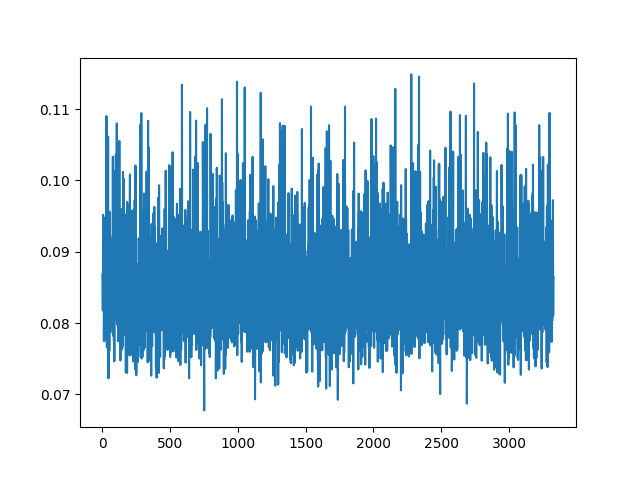

[nan, 0.08680164969366794, 0.08467489320116844, 0.08177685643358697, 0.08994850562492017, 0.09517461928525386, 0.09076534081094496, 0.08994045470865353, 0.08741370673086883, 0.08853555245486974, 0.07923448493611537, 0.07750648852280938, 0.08356469302316945, 0.0852339671680251, 0.0775251132597861, 0.09035208043588547, 0.08211892952873669, 0.07805329294714844, 0.08860266134000823, 0.08385764236489404, 0.08553992049253518, 0.08317747401279435, 0.0876582836283994, 0.09482688319700153, 0.08607114157105239, 0.07938797709078614, 0.08830908928992551, 0.07793042834918057, 0.08573139874347602, 0.09156143713133104, 0.10901402173088964, 0.08936912485772541, 0.08258232972878495, 0.07658516496840613, 0.09487646052303894, 0.07927390047119717, 0.08312659388342551, 0.0833457606436925, 0.09779083872650549, 0.07999319398388247, 0.08489391797976378, 0.08227760785920553, 0.10614413261693699, 0.08334016506766793, 0.08319300368451236, 0.07225976497125593, 0.08355749844681332, 0.07844217644907774, 0.084712814

In [49]:
plt.figure()
plt.plot(maxcpa)
print(maxcpa)
maxcpa_str = list(map(str, maxcpa))

print(maxcpa_str)